In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
%pylab inline
pl.rcParams["font.size"] = 18

Populating the interactive namespace from numpy and matplotlib


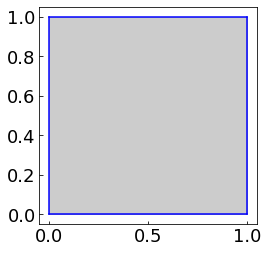

In [2]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")
x0, x1, y0, y1 = 0, 1, 0, 1
pl.plot([x0, x1], [y0, y0], 'b-')
pl.plot([x0, x0], [y0, y1], 'b-')
pl.plot([x0, x1], [y1, y1], 'b-')
pl.plot([x1, x1], [y0, y1], 'b-')

pl.fill_between([x0, x1], [y0, y0], [y1, y1], color='k', alpha=0.2);

In [3]:
print ("square area:", (x1 - x0) * (y1 - y0))

square area: 1


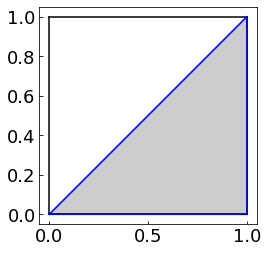

In [4]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")
x0, x1, y0, y1 = 0, 1, 0, 1
pl.plot([x0, x1], [y0, y0], 'k-')
pl.plot([x0, x0], [y0, y1], 'k-')
pl.plot([x0, x1], [y1, y1], 'k-')
pl.plot([x1, x1], [y0, y1], 'k-')

pl.plot([x0, x1], [y0, y0], 'b-')
pl.plot([x1, x1], [y0, y1], 'b-')
pl.plot([x0, x1], [y0, y1], 'b-')

pl.fill_between([x0, x1], [y0, y0], [y0, y1], color='k', alpha=0.2);

In [5]:
print ("triangle area:", (x1 - x0) * (y1 - y0) * 0.5)

triangle area: 0.5


In [6]:
#a function defining a triangle upper bound at every x as y=x
triangle = lambda x : x

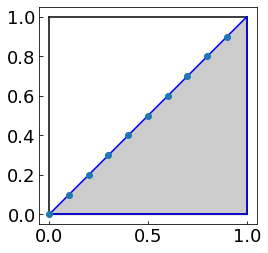

In [7]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")

pl.plot([x0, x1], [y0, y0], 'k-')
pl.plot([x0, x0], [y0, y1], 'k-')
pl.plot([x0, x1], [y1, y1], 'k-')
pl.plot([x1, x1], [y0, y1], 'k-')

pl.plot([x0, x1], [y0, y0], 'b-')
pl.plot([x1, x1], [y0, y1], 'b-')
pl.plot([x0, x1], [y0, y1], 'b-')

pl.fill_between([x0, x1], [y0, y0], [y0, y1], color='k', alpha=0.2)
pl.plot(np.arange(0,1,0.1), triangle(np.arange(0,1,0.1)), 'o');

In [8]:
n = 10
counterIn, counterOut = 0, 0

np.random.seed(123)
for f in range(n):
    x, y = np.random.rand(), np.random.rand()
    if y < x:
        counterIn += 1
    else: 
        counterOut += 1
print ("Tot\tIn\tOut\tratio")
print (n, "\t", counterIn, "\t", counterOut, "\t", counterIn * 1.0 / n)

Tot	In	Out	ratio
10 	 6 	 4 	 0.6


In [9]:
def getAreaTriangle(n, plot=False):
    """gets the area of a triangle by MC sampling
    Note: very inefficient version with c-style loop
    
    Args:
        n - random points to drop in the square area
    Returns:
        fraction of points that fall inside the triangle
    
    
    """
    counterIn, counterOut = 0, 0
    np.random.seed(228)
    for f in range(int(n)):  
        x, y = np.random.rand(), np.random.rand()
        if y < x:
            counterIn += 1
            if plot:
                plot[0].plot(x, y, 'o', color="black")
                plot[1].canvas.draw()
        else: 
            counterOut += 1
            if plot:
                plot[0].scatter(x, y, color="gray", alpha=0.3)
                plot[1].canvas.draw()
    return counterIn * 1.0 / n

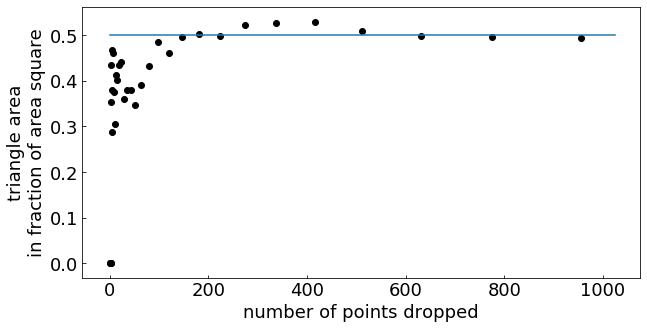

In [10]:
pl.ioff()
ax = pl.figure(figsize = (10,5)).add_subplot(111)
ax.plot([0, 2**10], [0.5, 0.5], label="true area")

np.random.seed(228)
for i in np.arange(0, 10, 0.3):
    ratio = getAreaTriangle(2**i)
    #print (2**i, ratio)
    ax.scatter(2**i, ratio, c='k')
ax.set_xlabel("number of points dropped")
ax.set_ylabel("triangle area\nin fraction of area square");

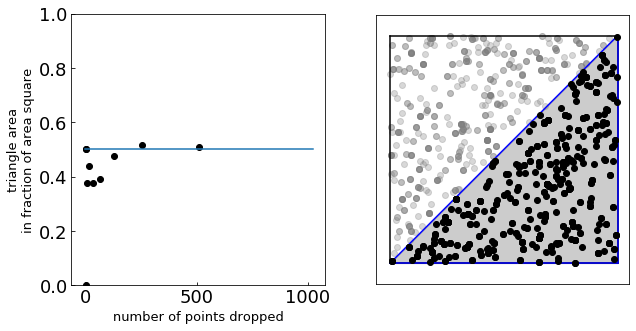

   	ratio	trueRatio	error
512.00 	0.51 	 0.5 		 0.02


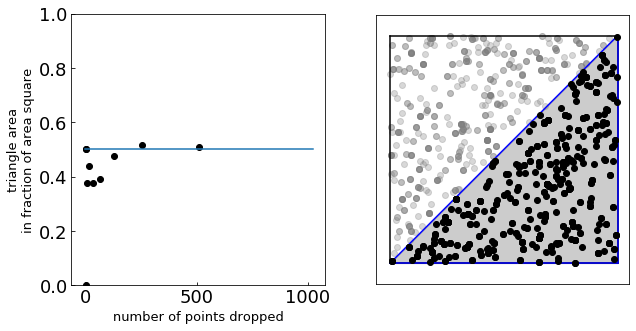

In [11]:
from IPython import display

fig = pl.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.set_aspect("equal")
ax1.plot([0, 2**10], [0.5, 0.5])
ax1.set_ylim(0, 1)
ax1.set_xlabel("number of points dropped", fontsize=13)
ax1.set_ylabel("triangle area\nin fraction of area square", fontsize=13);
ax2.set_ylim(-0.09, 1.09)
ax2.set_ylim(-0.09, 1.09)
ax2.plot([x0, x1], [y0, y0], 'k-')
ax2.plot([x0, x0], [y0, y1], 'k-')
ax2.plot([x0, x1], [y1, y1], 'k-')
ax2.plot([x1, x1], [y0, y1], 'k-')

ax2.plot([x0, x1], [y0, y0], 'b-')
ax2.plot([x1, x1], [y0, y1], 'b-')
ax2.plot([x0, x1], [y0, y1], 'b-')

ax2.fill_between([x0, x1], [y0, y0], [y0, y1], color='k', alpha=0.2)
pl.xticks([], [])
pl.yticks([], [])

for i in np.arange(0, 10, 1):
    np.random.seed(228)
    ratio = getAreaTriangle(2**i, plot=(ax2,  fig))
    #print (2**i, ratio)
    ax1.scatter(2**i, ratio, c='k')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print ("   \tratio\ttrueRatio\terror")
    print ("%.2f"%2**i, "\t%.2f"%ratio, "\t", 0.5, 
           "\t\t", "%.2f"%np.abs(1.0 - ratio / 0.5))


In [24]:
def getAreaAny(n, func=triangle, plot=False):
    """gets the area of an arbitrary shape by MC sampling
    Args:
        n - random points to drop in the square area
        func - (optional) function describing the upper bound of area (default: triangle)
        plot - (optional) whether to make/show scatterplot (default: False)
    Returns:
        fraction of points that fall inside the triangle
    """

    counterIn, counterOut = 0, 0
    x, y = np.random.rand(int(n)), np.random.rand(int(n))
    indxIn = y < func(x)
    counterIn = indxIn.sum()
    plot[0].scatter(x[indxIn], y[indxIn], color="black")
    counterOut = ~indxIn.sum()
    plot[0].scatter(x[~indxIn], y[~indxIn], color="gray", alpha=0.1)
    plot[1].canvas.draw()
    return counterIn * 1.0 / n

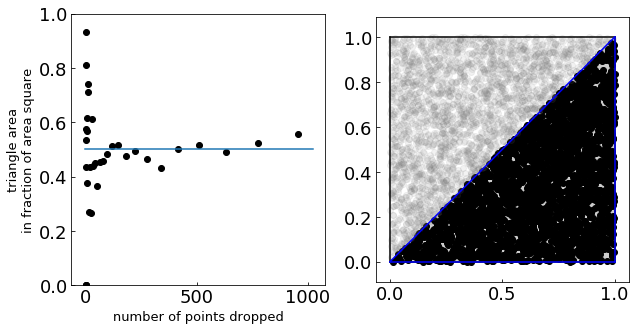

   	ratio	trueRatio	error
955.43 	0.56 	 0.5 		 0.11


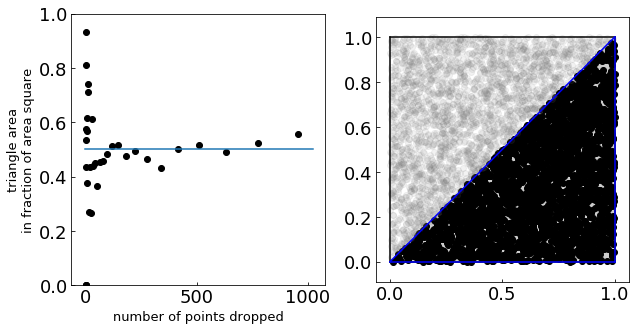

In [25]:
fig = pl.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.set_aspect("equal")
ax1.plot([0, 2**10], [0.5, 0.5])
ax1.set_ylim(0, 1)
ax1.set_xlabel("number of points dropped", fontsize=13)
ax1.set_ylabel("triangle area\nin fraction of area square", fontsize=13);
ax2.set_ylim(-0.09, 1.09)
ax2.set_ylim(-0.09, 1.09)
ax2.plot([x0, x1], [y0, y0], 'k-')
ax2.plot([x0, x0], [y0, y1], 'k-')
ax2.plot([x0, x1], [y1, y1], 'k-')
ax2.plot([x1, x1], [y0, y1], 'k-')

ax2.plot([x0, x1], [y0, y0], 'b-')
ax2.plot([x1, x1], [y0, y1], 'b-')
ax2.plot([x0, x1], [y0, y1], 'b-')

ax2.fill_between([x0, x1], [y0, y0], [y0, y1], color='k', alpha=0.2)
pl.xticks([], [])
pl.yticks([], [])

np.random.seed(228)
for i in np.arange(0, 10, 0.3):
    ratio = getAreaAny(2**i, plot=(ax2,  fig))
    #print (2**i, ratio)
    ax1.scatter(2**i, ratio, c='k')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print ("   \tratio\ttrueRatio\terror")
    print ("%.2f"%2**i, "\t%.2f"%ratio, "\t", 0.5, 
           "\t\t", "%.2f"%np.abs(1.0 - ratio / 0.5))


In [16]:
def myfunc(x, printint=False):
    p = np.poly1d([-0.3, 0, 0.5, 0.3, -0.4, 0.3])
    if printint:
        return p(x), p.integ
    return p(x)

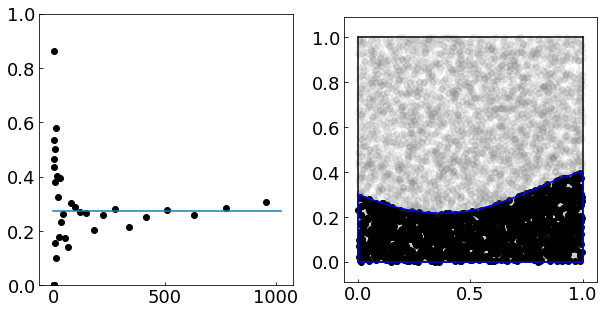

   	ratio	trueRatio	error
955.43 	0.31 	 0.275 		 0.11


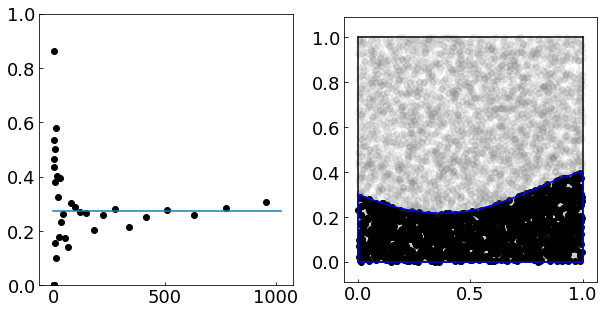

In [18]:
from IPython import display

fig = pl.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.set_aspect("equal")
trueRatio = myfunc(0,  printint=True)[1]()(1) - myfunc(0,  printint=True)[1]()(0)
ax1.plot([0, 2**10], [trueRatio, trueRatio])
ax1.set_ylim(0, 1)
ax1.set_xlabel("number of points dropped", fontsize=13)
ax1.set_ylabel("triangle area\nin fraction of area square", fontsize=13);
ax2.set_ylim(-0.09, 1.09)
ax2.set_ylim(-0.09, 1.09)
ax2.plot([x0, x1], [y0, y0], 'k-')
ax2.plot([x0, x0], [y0, y1], 'k-')
ax2.plot([x0, x1], [y1, y1], 'k-')
ax2.plot([x1, x1], [y0, y1], 'k-')

ax2.plot(np.linspace(x0, x1, 100), myfunc(np.linspace(x0, x1, 100)), 'b-')
ax2.plot([x0, x1], [y0, y0], 'b-')
ax2.plot([x1, x1], [y0, myfunc(x1)], 'b-')
ax2.plot([x0, x0], [y0, myfunc(x0)], 'b-')

ax2.fill_between(np.linspace(x0, x1, 100), [y0] * 100, 
                 myfunc(np.linspace(x0, x1, 100)), color='k', alpha=0.2)
pl.xticks([], [])
pl.yticks([], [])

np.random.seed(228)
for i in np.arange(0, 10, 0.3):
    ratio = getAreaAny(2**i, func=myfunc, plot=(ax2,  fig))
    ax1.scatter(2**i, ratio, c='k')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print ("   \tratio\ttrueRatio\terror")
    print ("%.2f"%2**i, "\t%.2f"%ratio, "\t", trueRatio, 
           "\t\t", "%.2f"%np.abs(1.0 - ratio / trueRatio))
    